

# 🚖 Cab Industry Profit Analysis


## 📌 Introduction
This notebook analyzes cab companies based on profit, gender, and yearly trends.


## 📊 Data Preprocessing
- Load data
- Clean missing values
- Merge datasets


## 📈 Exploratory Data Analysis (EDA)
- Profit Trends
- Gender Analysis
- Yearly Comparison


## 🔍 Conclusion
After evaluating both cab companies across multiple key factors, we have determined that Yellow Cab outperforms Pink Cab in several critical areas. Below are our key findings:

Customer Reach:

Yellow Cab has a broader customer reach, operating in 20 cities, compared to Pink Cab, which operates also in all cities but very less users as compared to Yellow cab except the SAN DIEGO CA.

Yellow Cab is also more effective at attracting users who previously used other cab services.

Customer Retention:
Analyzed in two segments (at least 5 rides and at least 10 rides with the same company).
Yellow Cab and Pink cab both having same customer retaintion.


Age-Wise Customer Reach:
Yellow Cab has customers across all age groups.
It is equally popular among 60+ customers as it is in the 18-25 age group, indicating a broader appeal.

Yellow Cab’s profit per kilometer is nearly three times that of Pink Cab.
This highlights a much stronger revenue model for Yellow Cab.
Income-Wise Customer Reach:

Both companies are popular among high- and medium-income customers.
However, Yellow Cab also successfully caters to the low-income segment, making it more inclusive.

Ride Count and Profit Forecasting (2019):
Both companies are projected to experience losses in profit and ride count.
From 2016 to 2018 they show dicline trends as well(Less Profit).

Profit Analysis:
Profit earned by Yellow cab is 90.91% higher than the Pink cab average profit.
These cabs usually users prefer for the 0-50 km. 80K times customers use the Pink Cab for 10-40km and while 180K time customers use the Yellow cab. 
Weekends are too busy compared to weekdays and the maximum number of customers uses these cab services on Friday. On public holidays, just 1443 times customers use Pink cab, while 4546 customers so, like 3 times more customers use this service.

Final Recommendation:
Based on the above analysis, we recommend investing in Yellow Cab due to its:
✅ Stronger customer reach
✅ Wider age and income group appeal
✅ Superior profit margins
✅ Lower forecasted losses

This makes Yellow Cab the more sustainable and profitable investment choice compared to Pink Cab. 🚖📈

In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\206833073.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import os
print(os.getcwd()) 

os.chdir("D:\London\Data_Work_London\Data_Analysis\Internship\Data_Glacier\week-2\Git-Hub\DataSets")

C:\Users\shaik


In [4]:
# Load datasets
cab_data = pd.read_csv("Cab_Data.csv")
transaction_ID = pd.read_csv("Transaction_ID.csv")
city_data = pd.read_csv("City.csv")
customer_ID = pd.read_csv("Customer_ID.csv")

In [5]:
# Display first few rows

cab_data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
first_date = cab_data['Date of Travel'].min()
last_date = cab_data['Date of Travel'].max()

print("Start Date:", first_date)
print("Last Date:", last_date)

Start Date: 42371
Last Date: 43465


In [7]:
transaction_ID.head()


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:


city_data.head()


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
cab_data.shape


(359392, 7)

In [11]:
transaction_ID.shape

(440098, 3)

In [12]:
city_data.shape

(20, 3)

In [13]:
customer_ID.shape

(49171, 4)

In [14]:
# -----------------------------------------------
# 🛠️ DATA CLEANING
# -----------------------------------------------
# Checking for missing values
print("\nMissing Values:")
print("\n")
print("Cab Data:\n", cab_data.isnull().sum())
print("\n")
print("Transaction Data:\n", transaction_ID.isnull().sum())
print("\n")
print("City Data:\n", city_data.isnull().sum())
print("\n")
print("Customer Data:\n", customer_ID.isnull().sum())


Missing Values:


Cab Data:
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


Transaction Data:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


City Data:
 City          0
Population    0
Users         0
dtype: int64


Customer Data:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [15]:
print(cab_data["Date of Travel"].dtype)

int64


In [16]:
# Convert 'Date of Travel' from Excel date format
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"], origin="1899-12-30", unit="D")


In [17]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [18]:
cab_data["Date of Travel"]

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [19]:
# Clean city data: Convert Population & Users to integer (remove commas)
city_data["Population"] = city_data["Population"].str.replace(",", "").astype(int)
city_data["Users"] = city_data["Users"].str.replace(",", "").astype(int)


In [20]:
# Merge datasets
merged_data = cab_data.merge(transaction_ID, on="Transaction ID", how="left")
merged_data = merged_data.merge(customer_ID, on="Customer ID", how="left")
merged_data = merged_data.merge(city_data, on="City", how="left")

merged_data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


In [21]:
 merged_data.shape

(359392, 14)

# -----------------------------------------------
# 📊 EXPLORATORY DATA ANALYSIS (EDA)
# -----------------------------------------------

In [22]:
# Basic statistics
print("\nDataset Summary:\n", merged_data.describe())



Dataset Summary:
        Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-17 01:37:55.042293760      22.567254   
min      1.000001e+07            2016-01-02 00:00:00       1.900000   
25%      1.011081e+07            2016-11-23 00:00:00      12.000000   
50%      1.022104e+07            2017-09-10 00:00:00      22.440000   
75%      1.033094e+07            2018-05-12 00:00:00      32.960000   
max      1.044011e+07            2018-12-31 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip    Customer ID            Age  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      423.443311     286.190113   19191.652115      35.336705   
min        15.600000      19.000000       1.000000      18.000000   
25%       206.437500     151.200000    2705.000000      25.000000

In [23]:

# Calculate additional fields
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']
merged_data['Margin %'] = (merged_data['Profit'] / merged_data['Price Charged']) * 100
merged_data['cost_per_km'] = merged_data['Cost of Trip'] / merged_data['KM Travelled']



In [24]:
# Categorise Age Group
# Define the bins for age groups
age_bins = [18, 25, 35, 45, 55, 65]  # Define your custom age ranges
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']  # Labels for each bin

# Create a new 'Age Group' column based on the defined bins
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=age_bins, labels=age_labels, right=True)

In [25]:
# Compute percentiles
low_threshold = merged_data["Income (USD/Month)"].quantile(0.33)  # 33rd percentile
medium_threshold = merged_data["Income (USD/Month)"].quantile(0.66)  # 66th percentile

# Assign categories based on percentiles
merged_data["Income Category"] = pd.cut(
    merged_data["Income (USD/Month)"], 
    bins=[0, low_threshold, medium_threshold, float('inf')], 
    labels=["Low Income", "Medium Income", "High Income"]
)

In [26]:
# Extract year and month directly from the datetime column

merged_data['Travel Month'] = merged_data['Date of Travel'].dt.to_period('M')
merged_data['Travel Year'] = merged_data['Date of Travel'].dt.year

In [27]:
merged_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Income (USD/Month),Population,Users,Profit,Margin %,cost_per_km,Age Group,Income Category,Travel Month,Travel Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885,24701,57.3150,15.450869,10.30,26-35,Medium Income,2016-01,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885,24701,23.6660,6.601026,11.70,26-35,Low Income,2016-01,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,...,11242,814885,24701,27.5680,22.019169,10.80,46-55,Medium Income,2016-01,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,...,23327,814885,24701,25.7980,6.835718,10.60,18-25,High Income,2016-01,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,...,8536,814885,24701,16.8440,14.695516,11.20,26-35,Low Income,2016-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,...,15651,418859,127001,5.8800,8.492201,13.20,18-25,Medium Income,2018-01,2018
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,...,6528,418859,127001,6.9020,6.067692,12.72,26-35,Low Income,2018-01,2018
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,...,7966,418859,127001,87.4200,20.001373,12.60,56-65,Low Income,2018-01,2018
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,...,6423,418859,127001,32.1420,21.986456,12.96,26-35,Low Income,2018-01,2018


In [28]:
first_date = merged_data['Date of Travel'].min()
last_date = merged_data['Date of Travel'].max()

print("Start Date:", first_date)
print("Last Date:", last_date)

Start Date: 2016-01-02 00:00:00
Last Date: 2018-12-31 00:00:00


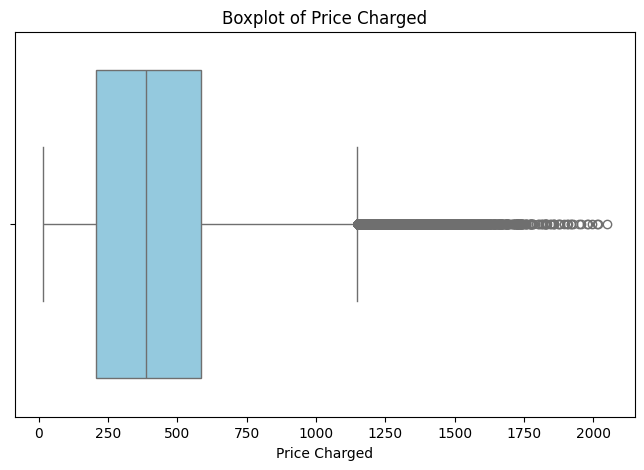

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 5))

# Create box plot
sns.boxplot(x=merged_data['Price Charged'], color="skyblue")

# Add title
plt.title("Boxplot of Price Charged")

# Show plot
plt.show()

In [30]:
#Detecting Outliers

import numpy as np

# Define function to detect outliers
def detect_outliers_iqr(merged_data, column):
    Q1 = merged_data[column].quantile(0.25)
    Q3 = merged_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return merged_data[(merged_data[column] < lower_bound) | (merged_data[column] > upper_bound)]

# Check outliers in price charged
outliers_price = detect_outliers_iqr(merged_data, 'Price Charged')
print("Outliers in Price Charged:", outliers_price.shape[0])

outliers_price






Outliers in Price Charged: 5958


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Income (USD/Month),Population,Users,Profit,Margin %,cost_per_km,Age Group,Income Category,Travel Month,Travel Year
233,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,...,8542,814885,24701,877.0076,65.391233,13.68,18-25,Low Income,2016-01,2016
234,10000385,2016-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Cash,Male,...,3901,814885,24701,895.7768,63.437588,12.24,26-35,Low Income,2016-01,2016
237,10000388,2016-01-07,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Card,Male,...,17761,814885,24701,944.1908,61.286815,12.96,26-35,Medium Income,2016-01,2016
240,10000391,2016-01-09,Yellow Cab,ATLANTA GA,38.08,1239.72,539.2128,27891,Cash,Male,...,14593,814885,24701,700.5072,56.505275,14.16,18-25,Medium Income,2016-01,2016
247,10000398,2016-01-02,Yellow Cab,ATLANTA GA,38.85,1430.64,545.4540,29558,Cash,Male,...,9555,814885,24701,885.1860,61.873427,14.04,26-35,Low Income,2016-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356234,10435777,2018-12-29,Yellow Cab,NEW YORK NY,43.70,1250.09,608.3040,2385,Card,Male,...,28824,8405837,302149,641.7860,51.339184,13.92,26-35,High Income,2018-12,2018
356286,10435832,2018-12-28,Yellow Cab,NEW YORK NY,46.02,1278.24,579.8520,1697,Card,Female,...,12856,8405837,302149,698.3880,54.636688,12.60,26-35,Medium Income,2018-12,2018
356292,10435838,2018-12-28,Yellow Cab,NEW YORK NY,41.80,1268.75,516.6480,444,Cash,Female,...,22015,8405837,302149,752.1020,59.278975,12.36,56-65,High Income,2018-12,2018
356303,10435849,2018-12-28,Yellow Cab,NEW YORK NY,47.60,1215.36,616.8960,1258,Cash,Male,...,27269,8405837,302149,598.4640,49.241706,12.96,36-45,High Income,2018-12,2018


# Due to lack of information related to the duration of travel so, this one can't remove from the dataset
#


# -----------------------------------------------
# 🏆 INSIGHTS & RECOMMENDATIONS
# -----------------------------------------------

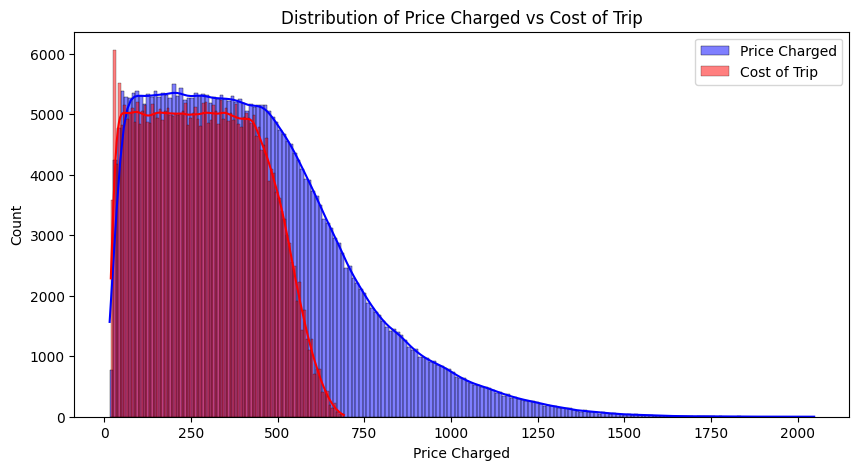

In [31]:
# Distribution of trip cost vs price charged
plt.figure(figsize=(10, 5))
sns.histplot(merged_data["Price Charged"], kde=True, color="blue", label="Price Charged")
sns.histplot(merged_data["Cost of Trip"], kde=True, color="red", label="Cost of Trip")
plt.legend()
plt.title("Distribution of Price Charged vs Cost of Trip")
plt.show()

Skewed Distribution:

Both distributions are right-skewed, meaning most trips have lower prices/costs, but there are a few high-value trips.
Overlap in Lower Range:

The Cost of Trip (red) and Price Charged (blue) overlap significantly in the lower price range (0-500).
This suggests that for most trips, the cost and price charged are closely aligned.
Higher Price Charged Beyond Cost:

Beyond 500, the Price Charged (blue) dominates, meaning the fare charged is significantly higher than the cost.
This implies that higher-priced trips have a greater markup, likely due to premium services, distance, or surge pricing.
Sharp Decline in Cost of Trip:

The Cost of Trip (red) falls off sharply after 500, while Price Charged (blue) continues at higher values.
This supports the idea that the platform/operator profits more from expensive trips.

In [32]:
#Export the final data
#merged_data.to_csv("final.csv", index=False)

Company-wise Profit Analysis:
                     sum        mean
Company                             
Pink Cab    5.307328e+06   62.652174
Yellow Cab  4.402037e+07  160.259986


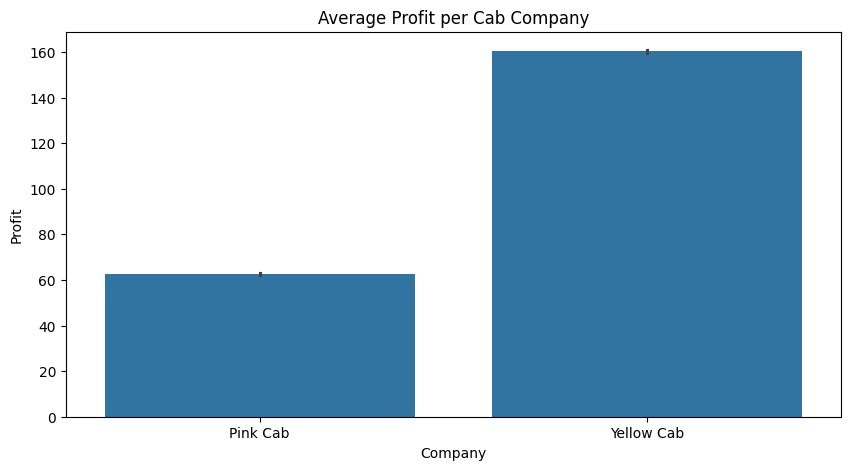

In [33]:
# Company-wise Profit Analysis
profit_by_company = merged_data.groupby('Company')['Profit'].agg(['sum', 'mean'])
print("Company-wise Profit Analysis:")
print(profit_by_company)

# Average profit per company
plt.figure(figsize=(10, 5))
sns.barplot(x="Company", y="Profit", data=merged_data, estimator=np.mean)
plt.title("Average Profit per Cab Company")
plt.show()

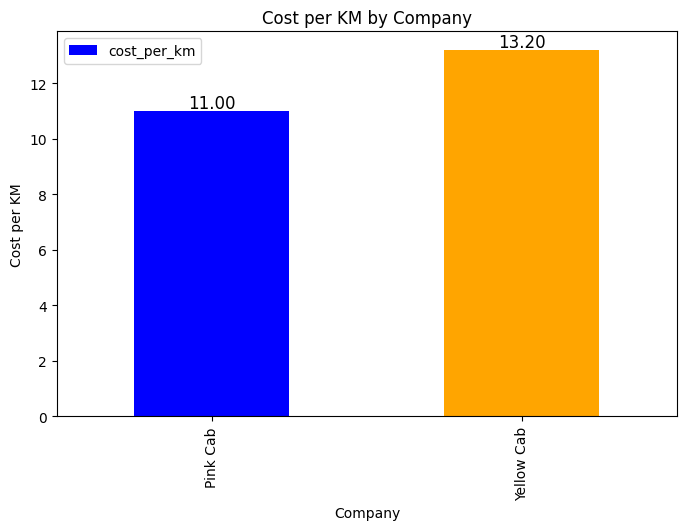

In [34]:
# Cost per KM comparison with Data Labels
cost_per_km_by_company = merged_data.groupby('Company')['cost_per_km'].mean()
plt.figure(figsize=(8,5))
bars = cost_per_km_by_company.plot(kind='bar', color=['blue', 'orange'])
for i, v in enumerate(cost_per_km_by_company):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=12)
plt.title('Cost per KM by Company')
plt.xlabel('Company')
plt.ylabel('Cost per KM')
plt.legend()
plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\757887110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=trip_counts.index, y=trip_counts.values, palette='coolwarm')


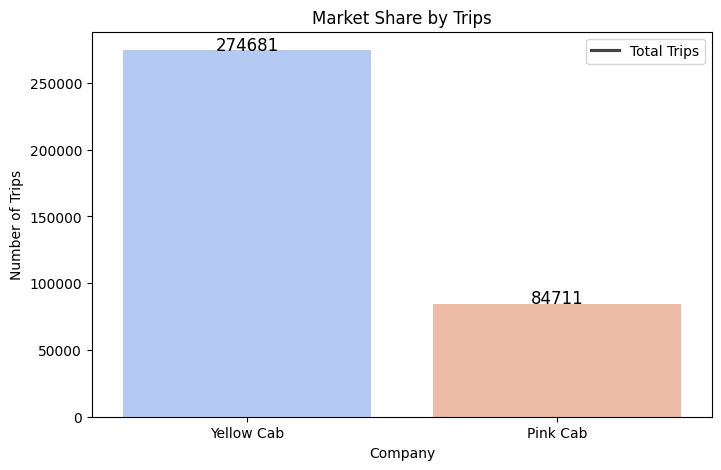

In [35]:
# Market Share (Total Trips by Company) with Data Labels
plt.figure(figsize=(8,5))
trip_counts = merged_data['Company'].value_counts()
bars = sns.barplot(x=trip_counts.index, y=trip_counts.values, palette='coolwarm')
for i, v in enumerate(trip_counts):
    plt.text(i, v + 100, str(v), ha='center', fontsize=12)
plt.title('Market Share by Trips')
plt.xlabel('Company')
plt.ylabel('Number of Trips')
plt.legend(['Total Trips'])
plt.show()

<Figure size 1200x600 with 0 Axes>

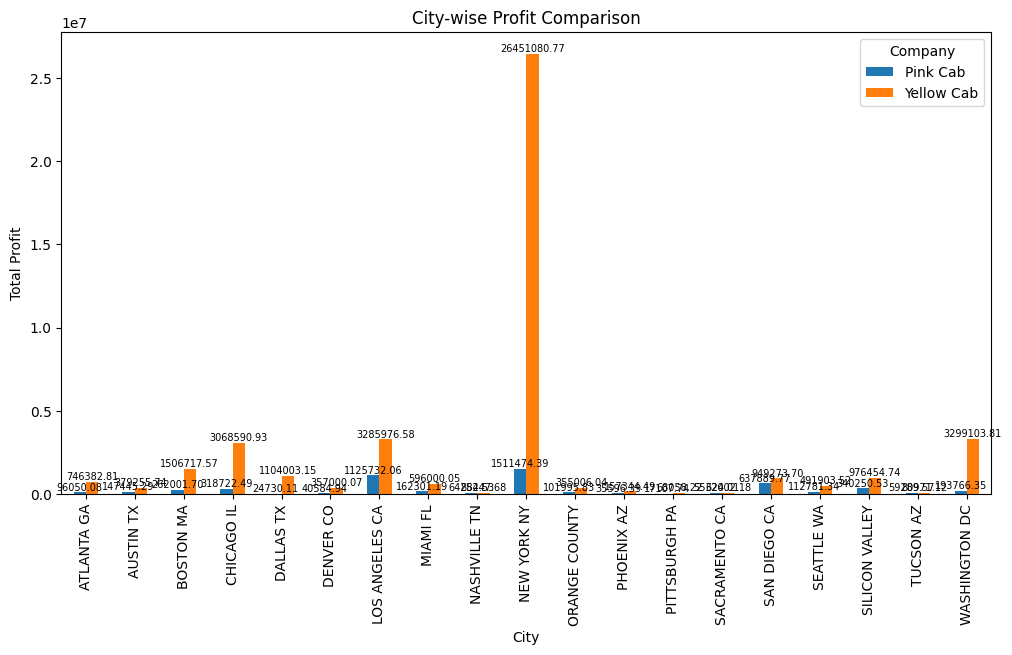

In [36]:
# City-wise Profitability with Data Labels
plt.figure(figsize=(12,6))
city_profit = merged_data.groupby(['City', 'Company'])['Profit'].sum().unstack()
ax = city_profit.plot(kind='bar', figsize=(12,6))
plt.title('City-wise Profit Comparison')
plt.ylabel('Total Profit')
plt.legend(title='Company')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', fontsize=7)
plt.show()

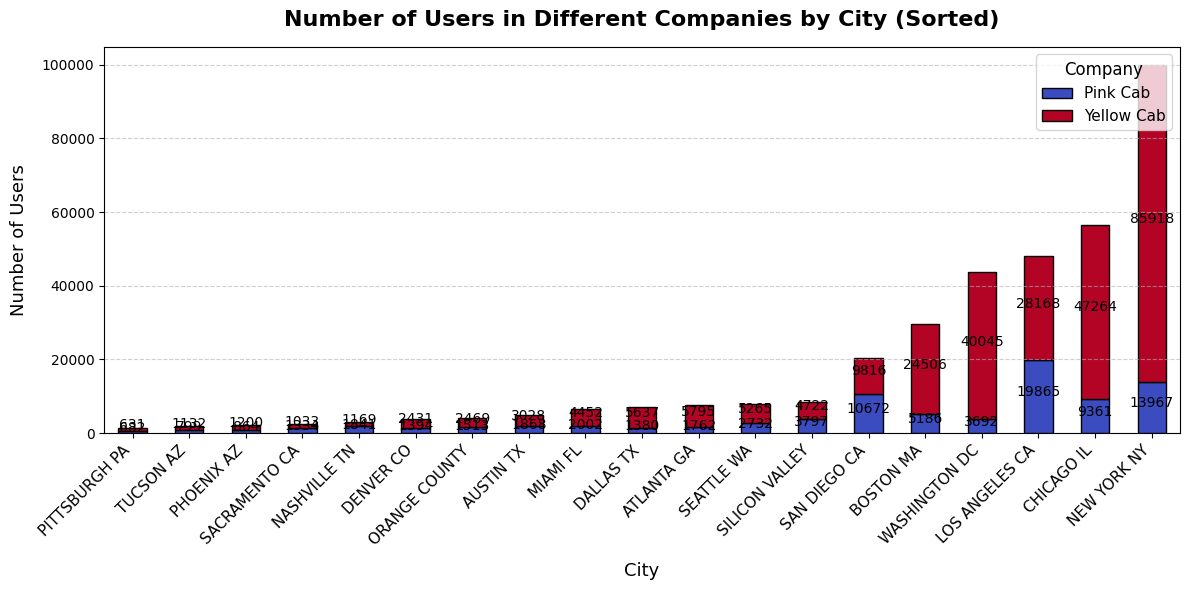

In [37]:
import matplotlib.pyplot as plt

# Group by City and Company, then count the number of users
city_profit = merged_data.groupby(['City', 'Company'])['Customer ID'].count().unstack()

# Sort cities by total number of users (ascending order)
city_profit['Total'] = city_profit.sum(axis=1)  # Calculate total users per city
city_profit = city_profit.sort_values(by='Total', ascending=True).drop(columns=['Total'])  # Sort & remove total column

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))  

# Plot stacked bar chart
city_profit.plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black", ax=ax)

# Title & Labels
ax.set_title("Number of Users in Different Companies by City (Sorted)", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("City", fontsize=13, labelpad=10)
ax.set_ylabel("Number of Users", fontsize=13, labelpad=10)

# Rotate x-axis labels properly
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=11)

# Customize legend
ax.legend(title="Company", fontsize=11, title_fontsize=12, loc="upper right")

# Annotate each bar with the exact number of users
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.0f", fontsize=10, padding=3, label_type="center")

# Improve grid visibility
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

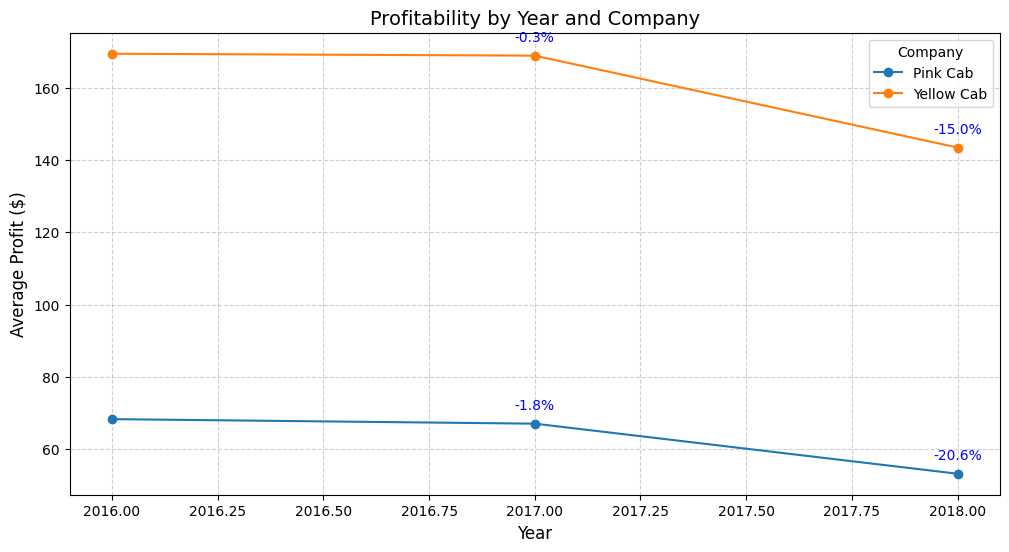

In [38]:
import matplotlib.pyplot as plt

# Ensure "Travel Year" is numeric
merged_data["Travel Year"] = merged_data["Travel Year"].astype(int)

# Group by Year and Company, then calculate the mean profit
yearly_profit = merged_data.groupby(["Travel Year", "Company"])["Profit"].mean().unstack()

# Calculate the percentage change (Year-over-Year)
yearly_profit_pct = yearly_profit.pct_change() * 100  # Convert to percentage

# Plot Profitability Trends
plt.figure(figsize=(12, 6))
ax = yearly_profit.plot(kind="line", marker="o", figsize=(12, 6))

# Title and labels
plt.title("Profitability by Year and Company", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Profit ($)", fontsize=12)
plt.legend(title="Company")

# Annotate each point with the profit percentage change
for company in yearly_profit.columns:
    for i, txt in enumerate(yearly_profit[company]):
        year = yearly_profit.index[i]
        profit_change = yearly_profit_pct[company][year]

        if not pd.isna(profit_change):  # Avoid NaN values
            color = "red" if profit_change > 0 else "blue"  # Red for positive, Blue for negative
            ax.annotate(f"{profit_change:.1f}%", 
                        (year, txt), 
                        textcoords="offset points",
                        xytext=(0, 10), 
                        ha="center", fontsize=10, color=color)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<Figure size 1000x600 with 0 Axes>

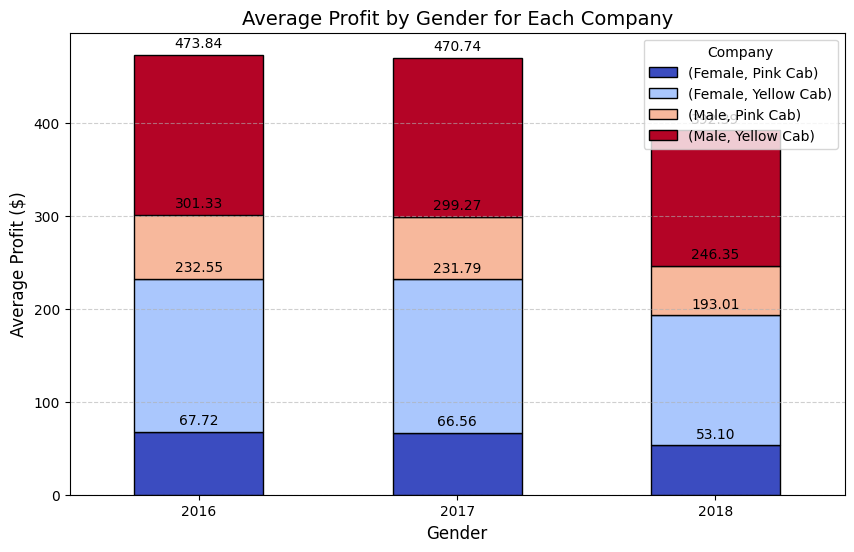

In [39]:

# Group by Gender, Company, and Travel Year, then calculate the mean profit
gender_profit = merged_data.groupby(["Gender", "Company", "Travel Year"])["Profit"].mean().unstack(level=[0, 1])

# Stacked bar chart
plt.figure(figsize=(10, 6))
ax = gender_profit.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm", edgecolor="black")

# Title & Labels
plt.title("Average Profit by Gender for Each Company", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Profit ($)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Company")

# Annotate each bar with the exact profit value
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.2f", fontsize=10, padding=3)

# Show plot
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [40]:
min_age = merged_data["Age"].min()
max_age = merged_data["Age"].max()

In [41]:
print(min_age)
print(max_age)

18
65


C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\4228994806.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_class_profit = merged_data.groupby(


<Figure size 1200x800 with 0 Axes>

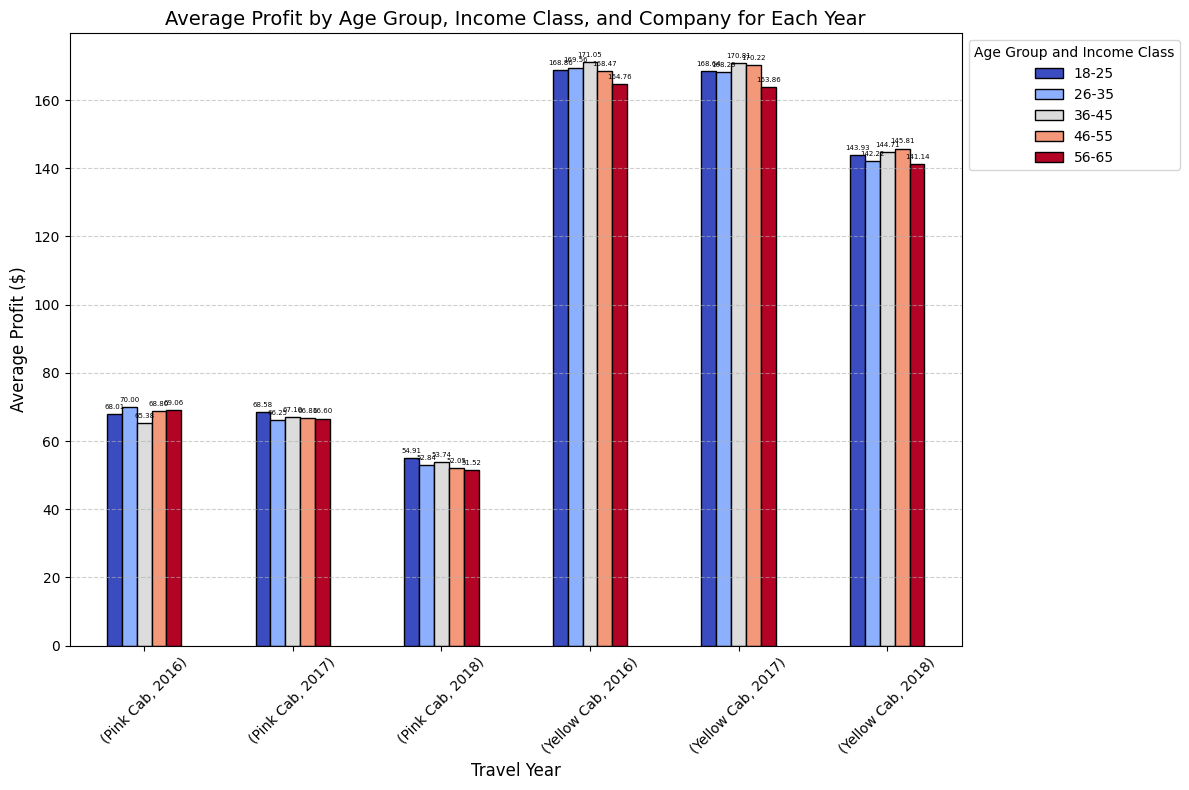

In [42]:
import matplotlib.pyplot as plt

# Group by Age Group, Income Class, Company, and Travel Year, then calculate the mean profit
age_income_class_profit = merged_data.groupby(
    ["Age Group", "Company", "Travel Year"]
)["Profit"].mean().unstack(level=["Age Group"])

# Plotting
plt.figure(figsize=(12, 8))
ax = age_income_class_profit.plot(kind="bar", figsize=(12, 8), colormap="coolwarm", edgecolor="black")

# Title & Labels
plt.title("Average Profit by Age Group, Income Class, and Company for Each Year", fontsize=14)
plt.xlabel("Travel Year", fontsize=12)
plt.ylabel("Average Profit ($)", fontsize=12)
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.legend(title="Age Group and Income Class", bbox_to_anchor=(1, 1), loc="upper left")

# Annotate each bar with the exact profit value
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.2f", fontsize=5, padding=3)

# Show plot
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()  # To ensure the legend and labels fit
plt.show()


C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\4285233865.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_class_profit = merged_data.groupby(


<Figure size 1000x600 with 0 Axes>

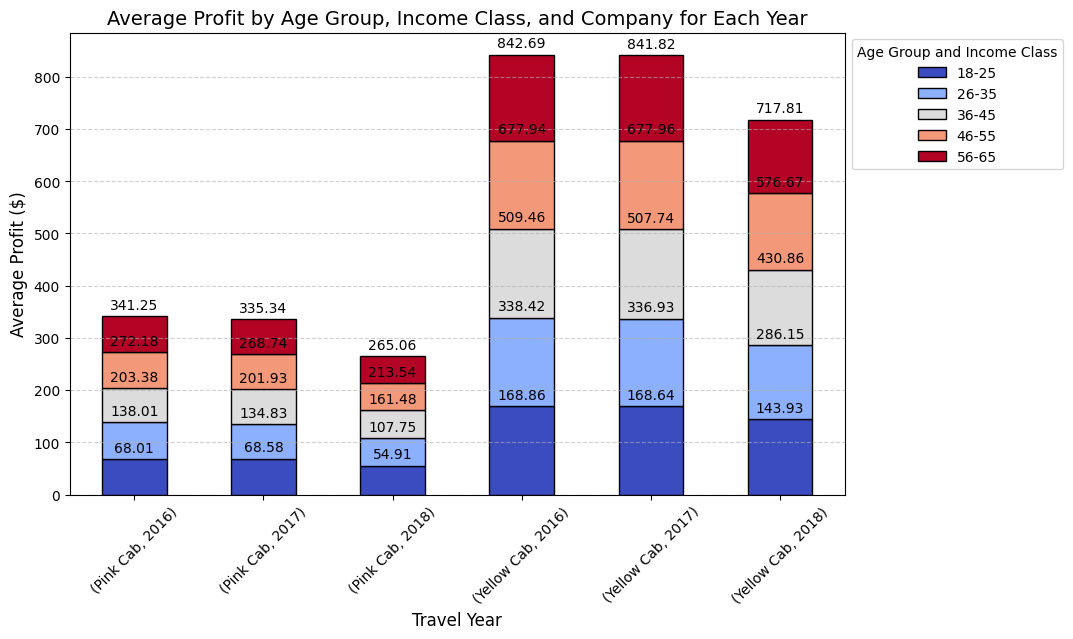

In [43]:

# Group by Gender, Company, and Travel Year, then calculate the mean profit
# Group by Age Group, Income Class, Company, and Travel Year, then calculate the mean profit
age_income_class_profit = merged_data.groupby(
    ["Age Group", "Company", "Travel Year"]
)["Profit"].mean().unstack(level=["Age Group"])

# Stacked bar chart
plt.figure(figsize=(10, 6))
ax = age_income_class_profit.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm", edgecolor="black")

# Title & Labels
plt.title("Average Profit by Age Group, Income Class, and Company for Each Year", fontsize=14)
plt.xlabel("Travel Year", fontsize=12)
plt.ylabel("Average Profit ($)", fontsize=12)
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.legend(title="Age Group and Income Class", bbox_to_anchor=(1, 1), loc="upper left")

# Annotate each bar with the exact profit value
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.2f", fontsize=10, padding=3)

# Show plot
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


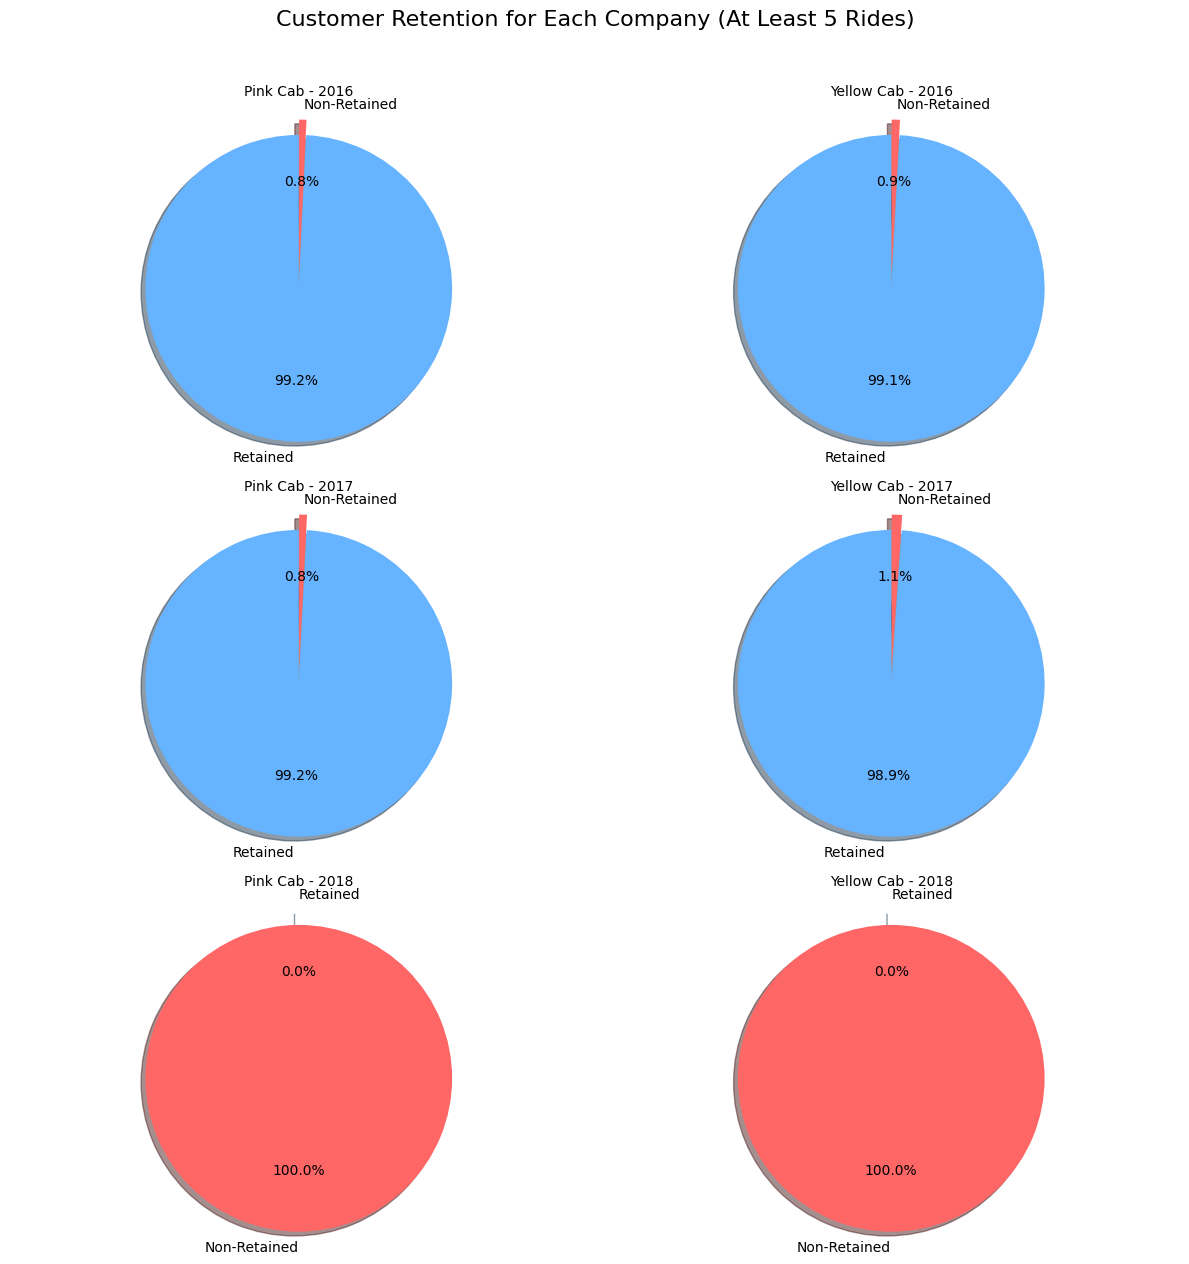

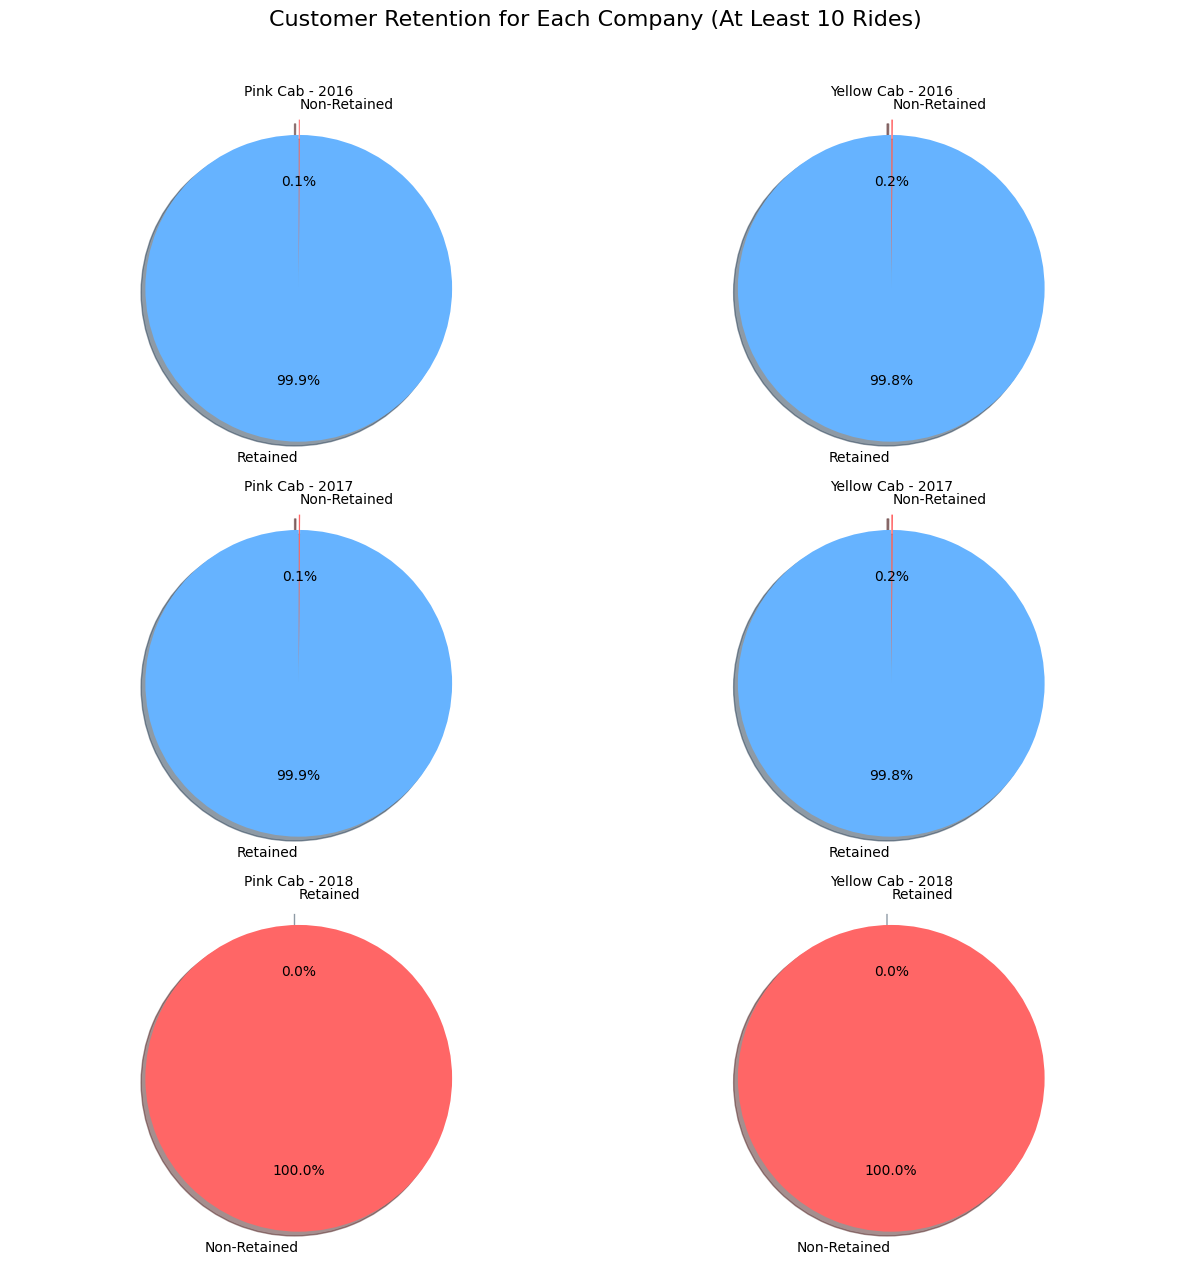

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Count the number of rides each customer took
rides_per_customer = merged_data.groupby(['Customer ID', 'Company'])['Transaction ID'].count().reset_index()

# Step 2: Filter customers who used at least 5 rides and 10 rides
customers_with_5_rides = rides_per_customer[rides_per_customer['Transaction ID'] >= 5]
customers_with_10_rides = rides_per_customer[rides_per_customer['Transaction ID'] >= 10]

# Function to calculate retention
def calculate_retention(customers_df, min_rides):
    retention_data = merged_data[merged_data['Customer ID'].isin(customers_df['Customer ID'])]
    retention_yearly = retention_data.groupby(['Customer ID', 'Travel Year', 'Company']).size().reset_index(name='Rides')
    
    # Check if customers returned the next year (retention)
    retention_yearly['Next Year'] = retention_yearly['Travel Year'] + 1
    retention_yearly['Retention'] = retention_yearly.apply(
        lambda row: row['Next Year'] in retention_yearly[(retention_yearly['Customer ID'] == row['Customer ID'])]['Travel Year'].values,
        axis=1
    )
    return retention_yearly

# Step 3: Calculate retention for both conditions
retention_5_rides_yearly = calculate_retention(customers_with_5_rides, 5)
retention_10_rides_yearly = calculate_retention(customers_with_10_rides, 10)

# Step 4: Get the list of years
years = sorted(merged_data['Travel Year'].unique())

# Function to generate pie charts
def plot_retention_pie_charts(retention_data, title):
    companies = merged_data['Company'].unique()
    
    fig, axes = plt.subplots(nrows=len(years), ncols=len(companies), figsize=(12, len(years) * 4))
    
    for i, year in enumerate(years):
        for j, company in enumerate(companies):
            retention_year_company = retention_data[(retention_data['Travel Year'] == year) & 
                                                    (retention_data['Company'] == company)]
            
            # Calculate retention vs non-retention for each company
            retention_counts = retention_year_company['Retention'].sum()
            total_customers = retention_year_company['Customer ID'].nunique()
            non_retained_counts = total_customers - retention_counts
            
            # Pie chart data
            labels = ['Retained', 'Non-Retained']
            sizes = [retention_counts, non_retained_counts]
            
            # Create pie chart for each company and year
            ax = axes[i, j] if len(years) > 1 else axes[j]  # Handle single-row case
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'], explode=(0.1, 0), shadow=True)
            ax.set_title(f"{company} - {year}", fontsize=10)
            ax.axis('equal')  # Ensure circles
    
    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.05)
    plt.show()

# Generate pie charts for 5-ride and 10-ride retention
plot_retention_pie_charts(retention_5_rides_yearly, "Customer Retention for Each Company (At Least 5 Rides)")
plot_retention_pie_charts(retention_10_rides_yearly, "Customer Retention for Each Company (At Least 10 Rides)")


In [45]:
merged_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Income (USD/Month),Population,Users,Profit,Margin %,cost_per_km,Age Group,Income Category,Travel Month,Travel Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885,24701,57.3150,15.450869,10.30,26-35,Medium Income,2016-01,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885,24701,23.6660,6.601026,11.70,26-35,Low Income,2016-01,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,...,11242,814885,24701,27.5680,22.019169,10.80,46-55,Medium Income,2016-01,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,...,23327,814885,24701,25.7980,6.835718,10.60,18-25,High Income,2016-01,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,...,8536,814885,24701,16.8440,14.695516,11.20,26-35,Low Income,2016-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,...,15651,418859,127001,5.8800,8.492201,13.20,18-25,Medium Income,2018-01,2018
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,...,6528,418859,127001,6.9020,6.067692,12.72,26-35,Low Income,2018-01,2018
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,...,7966,418859,127001,87.4200,20.001373,12.60,56-65,Low Income,2018-01,2018
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,...,6423,418859,127001,32.1420,21.986456,12.96,26-35,Low Income,2018-01,2018


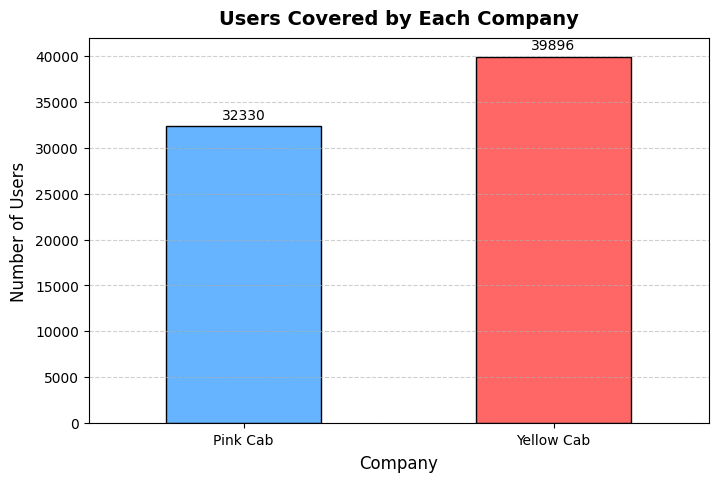

In [46]:
import matplotlib.pyplot as plt

# Count unique users per company
company_user_counts = merged_data.groupby("Company")["Customer ID"].nunique()

# Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))
company_user_counts.plot(kind="bar", color=['#66b3ff', '#ff6666'], edgecolor='black', ax=ax)

# Title & Labels
ax.set_title("Users Covered by Each Company", fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel("Company", fontsize=12, labelpad=5)
ax.set_ylabel("Number of Users", fontsize=12, labelpad=5)
ax.bar_label(ax.containers[0], fmt="%.0f", fontsize=10, padding=3)  # Annotate bar values

# Improve layout
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


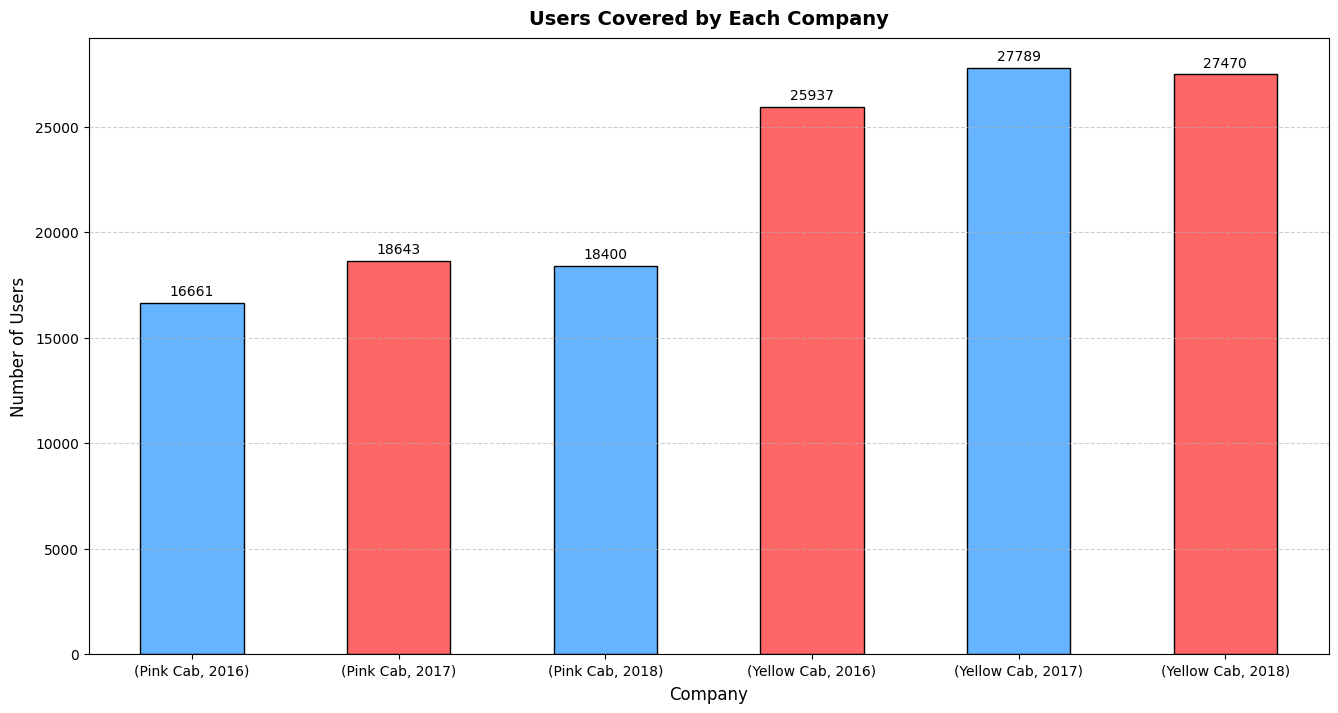

In [47]:
import matplotlib.pyplot as plt

# Count unique users per company
company_user_counts = merged_data.groupby(["Company", "Travel Year"])["Customer ID"].nunique()

# Bar Chart
fig, ax = plt.subplots(figsize=(16, 8))
company_user_counts.plot(kind="bar", color=['#66b3ff', '#ff6666'], edgecolor='black', ax=ax)

# Title & Labels
ax.set_title("Users Covered by Each Company", fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel("Company", fontsize=12, labelpad=5)
ax.set_ylabel("Number of Users", fontsize=12, labelpad=5)
ax.bar_label(ax.containers[0], fmt="%.0f", fontsize=10, padding=3)  # Annotate bar values

# Improve layout
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

(8, 5): Default size
(12, 6): Good for reports
(16, 8): Best for large datasets
(10, 10): Square plots

<Figure size 1600x800 with 0 Axes>

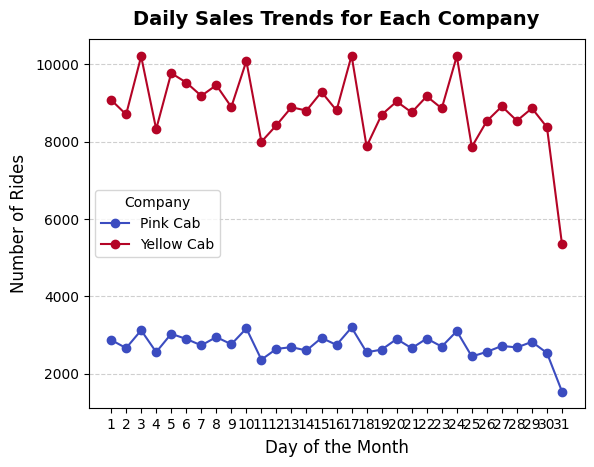

In [48]:
import matplotlib.pyplot as plt

# Extract day from the travel date
merged_data["Travel Day"] = pd.to_datetime(merged_data["Date of Travel"]).dt.day

# Group by Day and Company, then count number of rides
daily_sales = merged_data.groupby(["Travel Day", "Company"])["Transaction ID"].count().unstack()

# Plot line chart
plt.figure(figsize=(16, 8))
daily_sales.plot(marker='o', linestyle='-', colormap="coolwarm")

# Title & Labels
plt.title("Daily Sales Trends for Each Company", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Day of the Month", fontsize=12, labelpad=5)
plt.ylabel("Number of Rides", fontsize=12, labelpad=5)

# Customize x-axis for days (1 to 31)
plt.xticks(ticks=range(1, 32))

# Legend and Grid
plt.legend(title="Company")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


In [49]:
#Remove unwanted space
merged_data.columns = merged_data.columns.str.strip()  # Remove unwanted spaces


In [50]:
#merged_data["Travel Year"] = merged_data["Travel Year"].apply(lambda x: x[0] if isinstance(x, tuple) else x)
#merged_data["Company"] = merged_data["Company"].apply(lambda x: x[0] if isinstance(x, tuple) else x)


In [51]:
#Ensure Year Column Is Numeric
#merged_data["Travel Year"] = pd.to_numeric(merged_data["Travel Year"], errors="coerce")


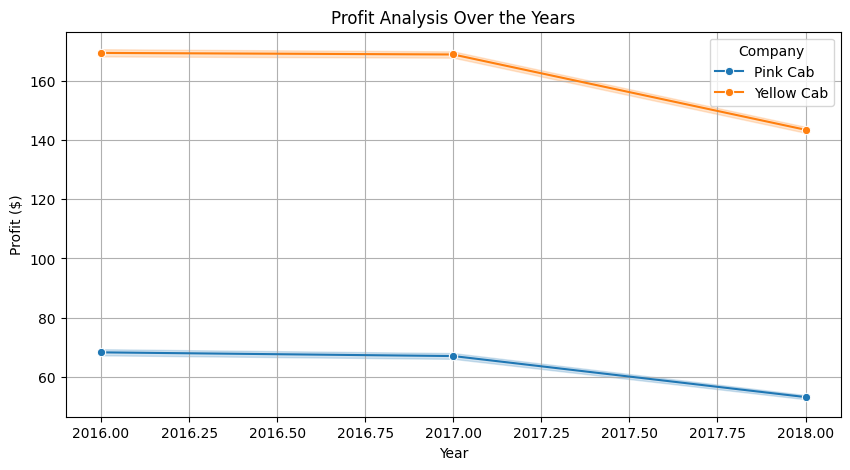

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (Replace with your dataset)

# Convert to DataFrame


# Plot Line Graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_data, x="Travel Year", y="Profit", hue="Company", marker="o")

# Labels & Title
plt.xlabel("Year")
plt.ylabel("Profit ($)")
plt.title("Profit Analysis Over the Years")
plt.grid(True)
plt.legend(title="Company")
plt.show()


In [53]:
merged_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Population,Users,Profit,Margin %,cost_per_km,Age Group,Income Category,Travel Month,Travel Year,Travel Day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,814885,24701,57.3150,15.450869,10.30,26-35,Medium Income,2016-01,2016,8
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,814885,24701,23.6660,6.601026,11.70,26-35,Low Income,2016-01,2016,6
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,...,814885,24701,27.5680,22.019169,10.80,46-55,Medium Income,2016-01,2016,2
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,...,814885,24701,25.7980,6.835718,10.60,18-25,High Income,2016-01,2016,7
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,...,814885,24701,16.8440,14.695516,11.20,26-35,Low Income,2016-01,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,...,418859,127001,5.8800,8.492201,13.20,18-25,Medium Income,2018-01,2018,8
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,...,418859,127001,6.9020,6.067692,12.72,26-35,Low Income,2018-01,2018,4
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,...,418859,127001,87.4200,20.001373,12.60,56-65,Low Income,2018-01,2018,5
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,...,418859,127001,32.1420,21.986456,12.96,26-35,Low Income,2018-01,2018,5


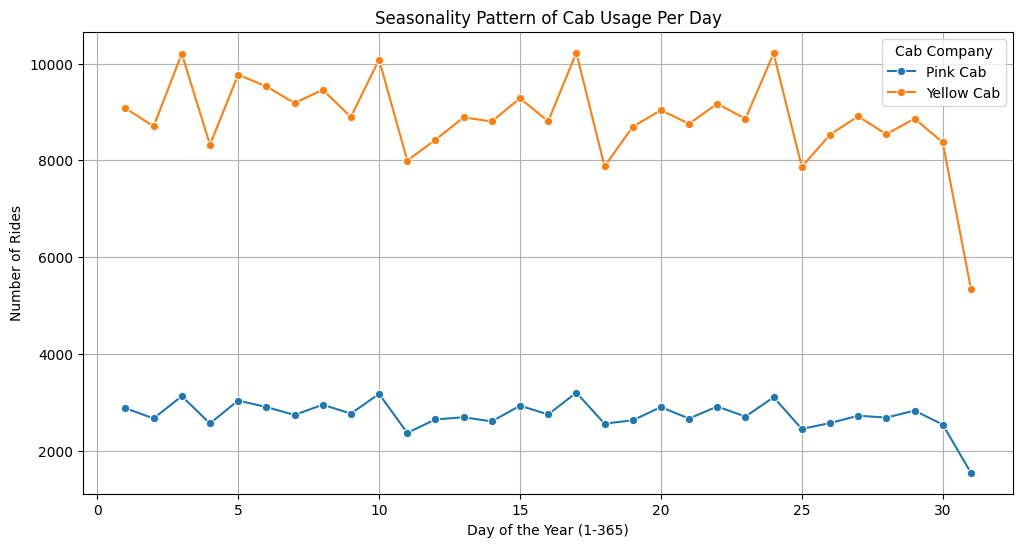

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Aggregate ride counts per day per company
daily_rides = merged_data.groupby(['Travel Day', 'Company']).size().reset_index(name='Ride_Count')

# Plot Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_rides, x='Travel Day', y='Ride_Count', hue='Company', marker="o")

# Labels and Title
plt.xlabel("Day of the Year (1-365)")
plt.ylabel("Number of Rides")
plt.title("Seasonality Pattern of Cab Usage Per Day")
plt.legend(title="Cab Company")
plt.grid(True)

# Show Plot
plt.show()


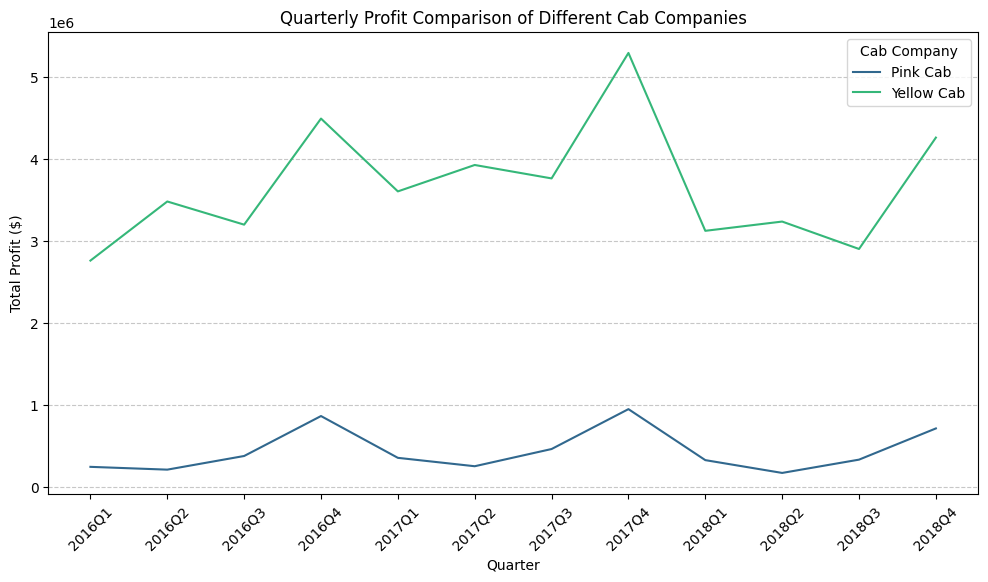

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extract Quarter
merged_data['Quarter'] = merged_data['Date of Travel'].dt.to_period('Q')

# Aggregate profit per quarter per company
quarterly_profit = merged_data.groupby(['Quarter', 'Company'])['Profit'].sum().reset_index()

# Convert Quarter to string for better plotting
quarterly_profit['Quarter'] = quarterly_profit['Quarter'].astype(str)

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_profit, x='Quarter', y='Profit', hue='Company', palette="viridis")

# Labels and Title
plt.xlabel("Quarter")
plt.ylabel("Total Profit ($)")
plt.title("Quarterly Profit Comparison of Different Cab Companies")
plt.legend(title="Cab Company")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()


In [56]:
merged_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Users,Profit,Margin %,cost_per_km,Age Group,Income Category,Travel Month,Travel Year,Travel Day,Quarter
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,24701,57.3150,15.450869,10.30,26-35,Medium Income,2016-01,2016,8,2016Q1
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,24701,23.6660,6.601026,11.70,26-35,Low Income,2016-01,2016,6,2016Q1
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,...,24701,27.5680,22.019169,10.80,46-55,Medium Income,2016-01,2016,2,2016Q1
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,...,24701,25.7980,6.835718,10.60,18-25,High Income,2016-01,2016,7,2016Q1
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,...,24701,16.8440,14.695516,11.20,26-35,Low Income,2016-01,2016,3,2016Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,...,127001,5.8800,8.492201,13.20,18-25,Medium Income,2018-01,2018,8,2018Q1
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,...,127001,6.9020,6.067692,12.72,26-35,Low Income,2018-01,2018,4,2018Q1
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,...,127001,87.4200,20.001373,12.60,56-65,Low Income,2018-01,2018,5,2018Q1
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,...,127001,32.1420,21.986456,12.96,26-35,Low Income,2018-01,2018,5,2018Q1


<Figure size 1200x600 with 0 Axes>

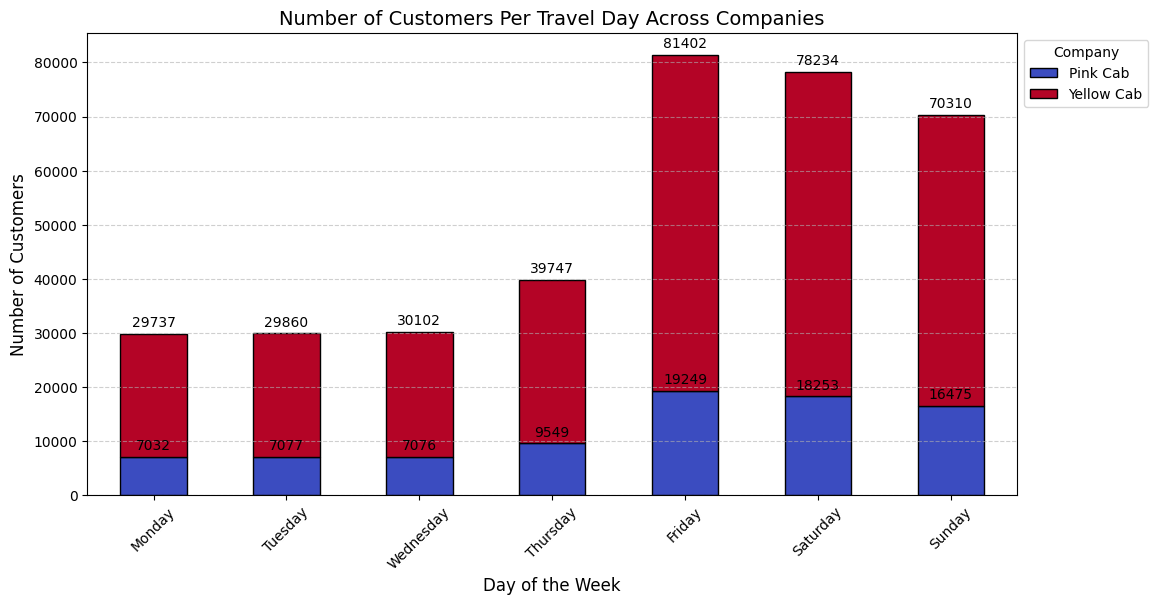

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date of Travel to datetime format
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'])

# Extract Day of Week (Monday to Sunday)
merged_data['Name of Travel Day'] = merged_data['Date of Travel'].dt.day_name()

# Ensure proper day order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Aggregate number of customers per day per company
Customer_per_day = merged_data.groupby(['Name of Travel Day', 'Company'])["Customer ID"].count().unstack(level=["Company"])

# Reorder index to ensure Monday-Sunday sequence
Customer_per_day = Customer_per_day.reindex(day_order)

# Plot Stacked Bar Chart
plt.figure(figsize=(12, 6))
ax = Customer_per_day.plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black", figsize=(12, 6))

# Title & Labels
plt.title("Number of Customers Per Travel Day Across Companies", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title="Company", bbox_to_anchor=(1, 1), loc="upper left")

# Annotate each bar with exact customer count
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.0f", fontsize=10, padding=3)

# Show plot
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\3819369664.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Customer_travel_distance = merged_data.groupby(['KM Travelled Category', 'Company'])['Customer ID'].count().unstack(level=["Company"])


<Figure size 1200x600 with 0 Axes>

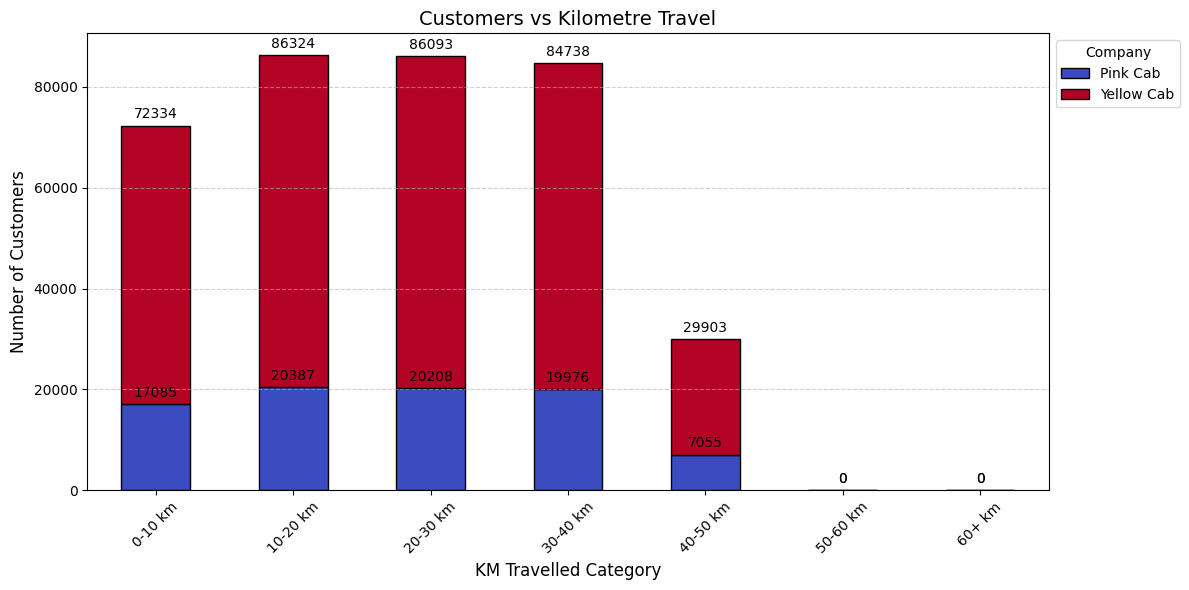

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define distance bins (0-10 km, 10-20 km, etc.)
bins = [0, 10, 20, 30, 40, 50, 60, 70]  # Add more if necessary
labels = ["0-10 km", "10-20 km", "20-30 km", "30-40 km", "40-50 km", "50-60 km", "60+ km"]

# Create a new column 'KM Travelled Category' with the defined bins
merged_data['KM Travelled Category'] = pd.cut(merged_data['KM Travelled'], bins=bins, labels=labels, right=False)

# Aggregate number of customers per KM Travelled Category and Company
Customer_travel_distance = merged_data.groupby(['KM Travelled Category', 'Company'])['Customer ID'].count().unstack(level=["Company"])

# Plot Stacked Bar Chart
plt.figure(figsize=(12, 6))
ax = Customer_travel_distance.plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black", figsize=(12, 6))

# Title & Labels
plt.title("Customers vs Kilometre Travel", fontsize=14)
plt.xlabel("KM Travelled Category", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title="Company", bbox_to_anchor=(1, 1), loc="upper left")

# Annotate each bar with exact customer count
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.0f", fontsize=10, padding=3)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show plot
plt.show()


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a comprehensive list of US public holidays (New Year's Day, Christmas, etc.)
holidays = pd.to_datetime([
    # New Year's Day
    "2016-01-01", "2017-01-01", "2018-01-01",
    # Martin Luther King Jr. Day (Third Monday of January)
    "2016-01-18", "2017-01-16", "2018-01-15",
    # Presidents' Day (Third Monday of February)
    "2016-02-15", "2017-02-20", "2018-02-19",
    # Memorial Day (Last Monday of May)
    "2016-05-30", "2017-05-29", "2018-05-28",
    # Independence Day (July 4th)
    "2016-07-04", "2017-07-04", "2018-07-04",
    # Labor Day (First Monday of September)
    "2016-09-05", "2017-09-04", "2018-09-03",
    # Thanksgiving Day (Fourth Thursday of November)
    "2016-11-24", "2017-11-23", "2018-11-22",
    # Christmas Day
    "2016-12-25", "2017-12-25", "2018-12-25",
])

# Convert 'Date of Travel' to datetime if it's not already
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'])

# Create a new column 'Is Holiday' to mark public holidays
merged_data['Is Holiday'] = merged_data['Date of Travel'].isin(holidays)


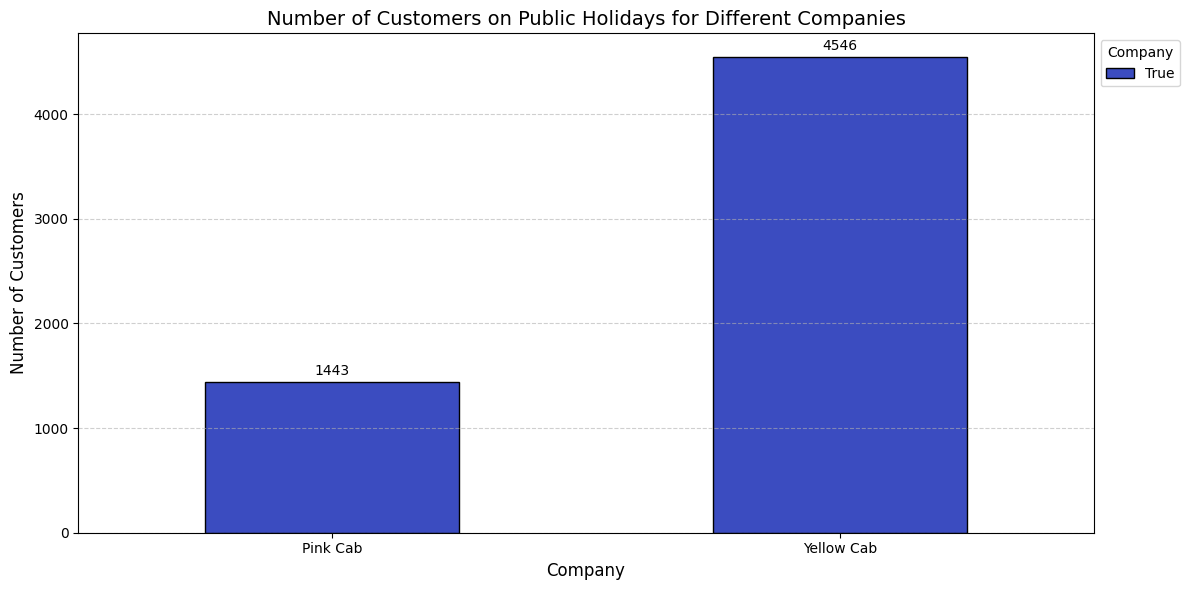

In [60]:
# Count the number of customers on holidays by company
holiday_customer_count = merged_data.groupby(['Is Holiday', 'Company'])['Customer ID'].count().unstack()

# Filter data to show only public holidays (Is Holiday = True)
holiday_customer_count = holiday_customer_count.loc[True]

# Plotting
plt.figure(figsize=(12, 6))
holiday_customer_count.plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black", figsize=(12, 6))

# Title & Labels
plt.title("Number of Customers on Public Holidays for Different Companies", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=0)  # Rotate labels for better readability
plt.legend(title="Company", bbox_to_anchor=(1, 1), loc="upper left")

# Annotate each bar with the exact customer count
for bars in plt.gca().containers:
    plt.gca().bar_label(bars, fmt="%.0f", fontsize=10, padding=3)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show plot
plt.show()


<Figure size 1400x700 with 0 Axes>

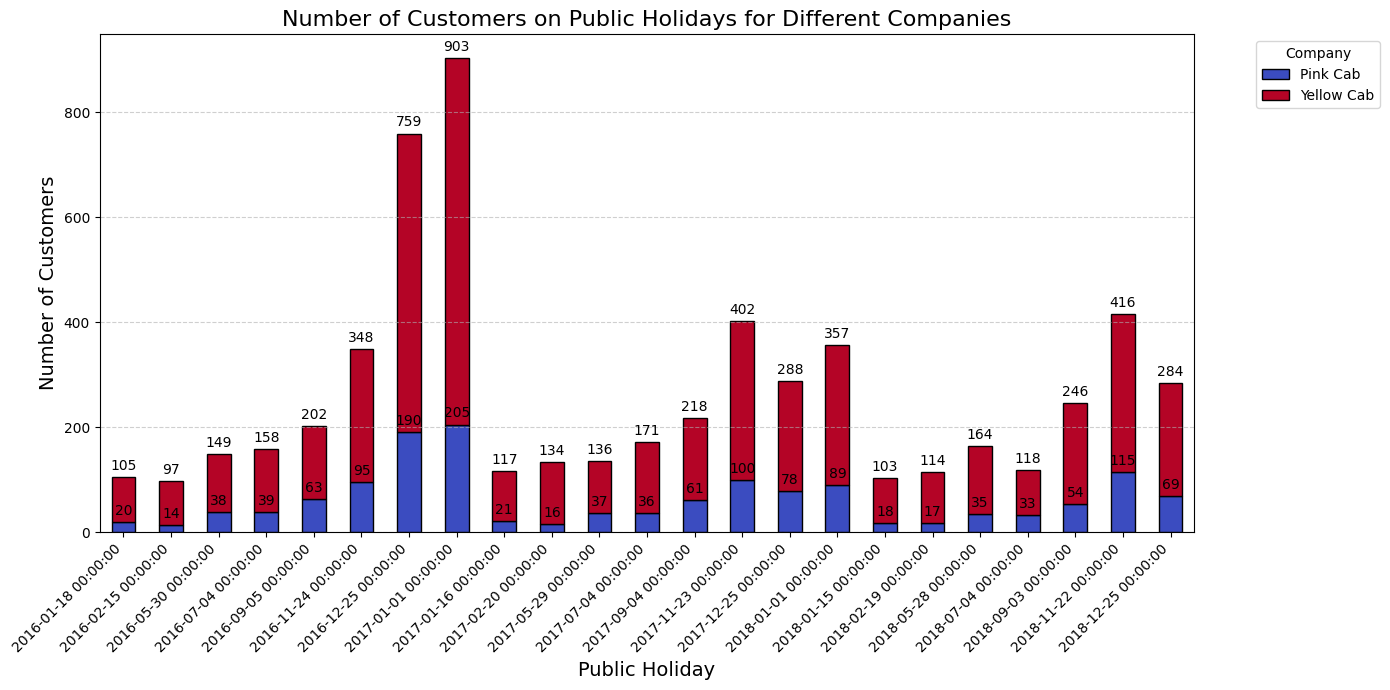

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a comprehensive list of US public holidays (New Year's Day, Christmas, etc.)
holidays = pd.to_datetime([
    # New Year's Day
    "2016-01-01", "2017-01-01", "2018-01-01",
    # Martin Luther King Jr. Day (Third Monday of January)
    "2016-01-18", "2017-01-16", "2018-01-15",
    # Presidents' Day (Third Monday of February)
    "2016-02-15", "2017-02-20", "2018-02-19",
    # Memorial Day (Last Monday of May)
    "2016-05-30", "2017-05-29", "2018-05-28",
    # Independence Day (July 4th)
    "2016-07-04", "2017-07-04", "2018-07-04",
    # Labor Day (First Monday of September)
    "2016-09-05", "2017-09-04", "2018-09-03",
    # Thanksgiving Day (Fourth Thursday of November)
    "2016-11-24", "2017-11-23", "2018-11-22",
    # Christmas Day
    "2016-12-25", "2017-12-25", "2018-12-25",
])

# Create a mapping of dates to holiday names
holiday_names = {
    "2016-01-01": "New Year's Day", "2017-01-01": "New Year's Day", "2018-01-01": "New Year's Day",
    "2016-01-18": "MLK Jr. Day", "2017-01-16": "MLK Jr. Day", "2018-01-15": "MLK Jr. Day",
    "2016-02-15": "Presidents' Day", "2017-02-20": "Presidents' Day", "2018-02-19": "Presidents' Day",
    "2016-05-30": "Memorial Day", "2017-05-29": "Memorial Day", "2018-05-28": "Memorial Day",
    "2016-07-04": "Independence Day", "2017-07-04": "Independence Day", "2018-07-04": "Independence Day",
    "2016-09-05": "Labor Day", "2017-09-04": "Labor Day", "2018-09-03": "Labor Day",
    "2016-11-24": "Thanksgiving Day", "2017-11-23": "Thanksgiving Day", "2018-11-22": "Thanksgiving Day",
    "2016-12-25": "Christmas Day", "2017-12-25": "Christmas Day", "2018-12-25": "Christmas Day"
}

# Convert 'Date of Travel' to datetime if it's not already
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'])

# Create a new column 'Is Holiday' to mark public holidays
merged_data['Is Holiday'] = merged_data['Date of Travel'].isin(holidays)

# Count the number of customers on each holiday by company
holiday_customer_count = merged_data[merged_data['Is Holiday']].groupby(['Date of Travel', 'Company'])['Customer ID'].count().unstack()

# Replace the x-axis labels (dates) with holiday names
holiday_customer_count = holiday_customer_count.rename(index=holiday_names)

# Plotting
plt.figure(figsize=(14, 7))

# Plot each company separately on the same chart
holiday_customer_count.plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black", figsize=(14, 7))

# Title & Labels
plt.title("Number of Customers on Public Holidays for Different Companies", fontsize=16)
plt.xlabel("Public Holiday", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate holiday names for better readability

# Add a legend and adjust its position
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc="upper left")

# Annotate each bar with the exact customer count
for bars in plt.gca().containers:
    plt.gca().bar_label(bars, fmt="%.0f", fontsize=10, padding=3)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


In [62]:
# Reset the index
merged_data.reset_index(inplace=True)

C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\1233045672.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  company_profit = merged_data.groupby([pd.Grouper(freq='M'), 'Company'])['Profit'].sum().unstack()


ADF Statistic: -3.884197934898054
p-value: 0.0021542689328377623


C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\1233045672.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=company_profit.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')


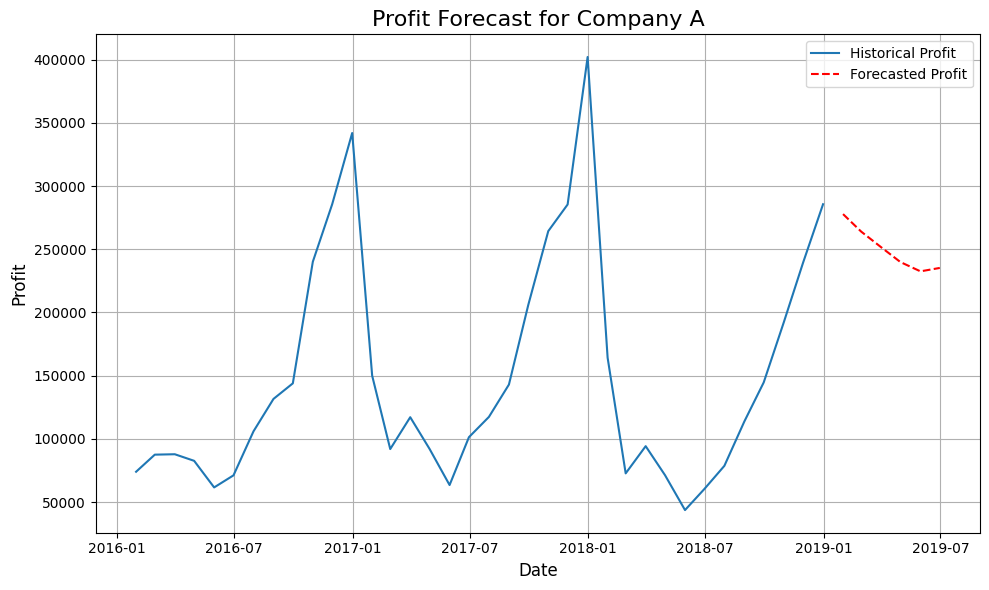

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters

# Register converters for better plotting
register_matplotlib_converters()

# Step 1: Aggregate profit by Date (e.g., monthly)
# Ensure you have 'Date of Travel' and 'Profit' in your merged data

merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'])
merged_data.set_index('Date of Travel', inplace=True)

# Aggregate profit for each company monthly
company_profit = merged_data.groupby([pd.Grouper(freq='M'), 'Company'])['Profit'].sum().unstack()

# Step 2: Check for stationarity (ADF Test)
result = adfuller(company_profit['Pink Cab'])  # You can replace 'Company A' with the desired company
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value is below 0.05, the series is stationary. If it's higher, you may need to differ the series.

# Step 3: Fit ARIMA Model
# Fit the ARIMA model for 'Company A' (or the company you're forecasting)
model = ARIMA(company_profit['Pink Cab'], order=(5, 1, 0))  # (p,d,q) -> you can tweak these params
model_fit = model.fit()

# Step 4: Forecast the next 6 months
forecast_steps = 6  # Forecasting for 6 months ahead
forecast = model_fit.forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(10, 6))

# Plot the historical profit and forecasted values
plt.plot(company_profit.index, company_profit['Pink Cab'], label="Historical Profit")
forecast_index = pd.date_range(start=company_profit.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
plt.plot(forecast_index, forecast, label="Forecasted Profit", color='red', linestyle='--')

# Add titles and labels
plt.title("Profit Forecast for Company A", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# Reset the index
merged_data.reset_index(inplace=True)

C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\1012669678.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  company_profit = merged_data.groupby([pd.Grouper(freq='M'), 'Company'])['Profit'].sum().unstack()



Processing forecast for Pink Cab...
ADF Statistic for Pink Cab: -3.884197934898054
p-value for Pink Cab: 0.0021542689328377623
Post-differencing ADF Statistic for Pink Cab: -3.884197934898054
Post-differencing p-value for Pink Cab: 0.0021542689328377623

Processing forecast for Yellow Cab...
ADF Statistic for Yellow Cab: -3.3375770239518077
p-value for Yellow Cab: 0.013280091687878562
Post-differencing ADF Statistic for Yellow Cab: -3.3375770239518077
Post-differencing p-value for Yellow Cab: 0.013280091687878562


C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\1012669678.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=company_profit.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
C:\Users\shaik\AppData\Local\Temp\ipykernel_28676\1012669678.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=company_profit.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')


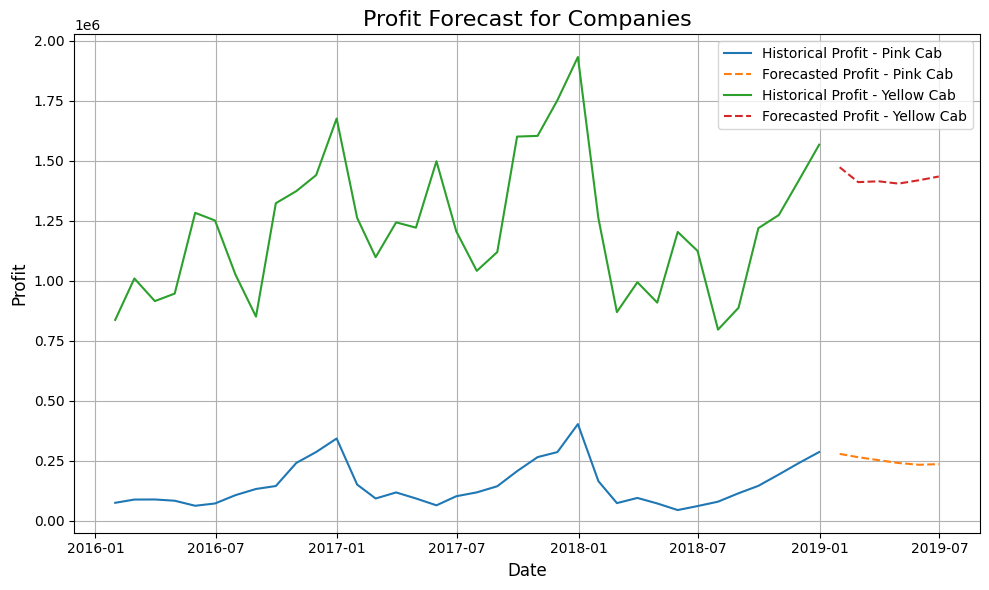

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters

# Register converters for better plotting
register_matplotlib_converters()

# Step 1: Aggregate profit by Date (e.g., monthly)
# Ensure you have 'Date of Travel' and 'Profit' in your merged data

merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'])
merged_data.set_index('Date of Travel', inplace=True)

# Aggregate profit for each company monthly
company_profit = merged_data.groupby([pd.Grouper(freq='M'), 'Company'])['Profit'].sum().unstack()

# List of companies to forecast
companies = company_profit.columns

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through each company to perform ARIMA modeling and forecasting
for company in companies:
    print(f"\nProcessing forecast for {company}...")
    
    # Step 2: Check for stationarity (ADF Test)
    result = adfuller(company_profit[company])  # ADF test for the current company
    print(f"ADF Statistic for {company}: {result[0]}")
    print(f"p-value for {company}: {result[1]}")

    # If p-value is above 0.05, we need to difference the data
    if result[1] > 0.05:
        print(f"{company} data is non-stationary. Differencing is applied.")
        company_profit[company] = company_profit[company].diff().dropna()

    # Recheck stationarity after differencing
    result = adfuller(company_profit[company])
    print(f"Post-differencing ADF Statistic for {company}: {result[0]}")
    print(f"Post-differencing p-value for {company}: {result[1]}")

    # Step 3: Fit ARIMA Model
    # Fit the ARIMA model for the current company
    model = ARIMA(company_profit[company], order=(5, 1, 0))  # You can adjust the p, d, q values
    model_fit = model.fit()

    # Step 4: Forecast the next 6 months
    forecast_steps = 6  # Forecasting for 6 months ahead
    forecast = model_fit.forecast(steps=forecast_steps)

    # Plotting the forecast
    plt.plot(company_profit.index, company_profit[company], label=f"Historical Profit - {company}")
    forecast_index = pd.date_range(start=company_profit.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
    plt.plot(forecast_index, forecast, label=f"Forecasted Profit - {company}", linestyle='--')

# Add titles and labels
plt.title("Profit Forecast for Companies", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
merged_data.head()

,index,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,cost_per_km,Age Group,Income Category,Travel Month,Travel Year,Travel Day,Quarter,Name of Travel Day,KM Travelled Category,Is Holiday
Date of Travel,,,,,,,,,,,,,,,,,,,,,
2016-01-08,0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,...,10.3,26-35,Medium Income,2016-01,2016,8,2016Q1,Friday,30-40 km,False
2016-01-06,1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,...,11.7,26-35,Low Income,2016-01,2016,6,2016Q1,Wednesday,20-30 km,False
2016-01-02,2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,...,10.8,46-55,Medium Income,2016-01,2016,2,2016Q1,Saturday,0-10 km,False
2016-01-07,3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,...,10.6,18-25,High Income,2016-01,2016,7,2016Q1,Thursday,30-40 km,False
2016-01-03,4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,...,11.2,26-35,Low Income,2016-01,2016,3,2016Q1,Sunday,0-10 km,False


In [67]:
# Reset the index
merged_data.reset_index(inplace=True)

C:\Users\shaik\AppData\Local\Temp\ipykernel_25660\1305673190.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = filtered_data.groupby([pd.Grouper(key='Date of Travel', freq='M'), 'Company'])['Profit'].sum().unstack()



Processing forecast for Pink Cab...
ADF Statistic: -3.884197934898054, p-value: 0.0021542689328377623

Processing forecast for Yellow Cab...
ADF Statistic: -3.3375770239518077, p-value: 0.013280091687878562


C:\Users\shaik\AppData\Local\Temp\ipykernel_25660\1305673190.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2019-01-01', periods=forecast_steps, freq='M')
C:\Users\shaik\AppData\Local\Temp\ipykernel_25660\1305673190.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2019-01-01', periods=forecast_steps, freq='M')


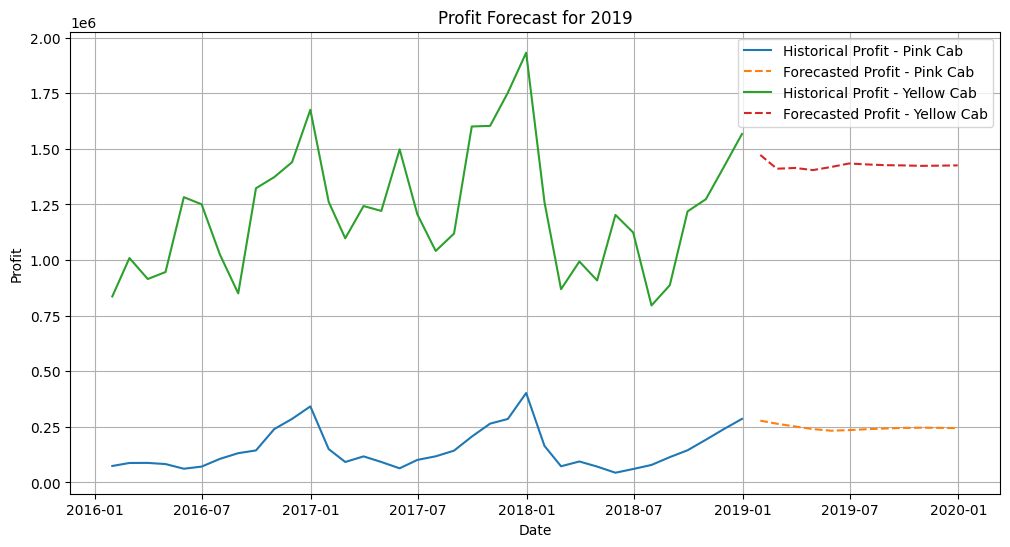

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Step 1: Convert 'Date of Travel' to datetime and extract year
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'])
merged_data['Year'] = merged_data['Date of Travel'].dt.year

# Step 2: Aggregate Monthly Profit (2016-2018)
filtered_data = merged_data[merged_data['Year'] < 2019]  # Use only past years
monthly_profit = filtered_data.groupby([pd.Grouper(key='Date of Travel', freq='M'), 'Company'])['Profit'].sum().unstack()

# Step 3: Forecast for Each Company
companies = monthly_profit.columns
forecast_steps = 12  # Forecast for 12 months of 2019

plt.figure(figsize=(12, 6))

for company in companies:
    print(f"\nProcessing forecast for {company}...")

    # Step 3.1: Check for stationarity
    result = adfuller(monthly_profit[company].dropna())
    print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

    # If data is non-stationary, apply differencing
    if result[1] > 0.05:
        print(f"Data is non-stationary for {company}, applying differencing...")
        monthly_profit[company] = monthly_profit[company].diff().dropna()

    # Step 3.2: Fit ARIMA Model
    model = ARIMA(monthly_profit[company], order=(5,1,0))  # (p,d,q) values can be tuned
    model_fit = model.fit()

    # Step 3.3: Forecasting 2019
    forecast_index = pd.date_range(start='2019-01-01', periods=forecast_steps, freq='M')
    forecast = model_fit.forecast(steps=forecast_steps)

    # Step 3.4: Plot Results
    plt.plot(monthly_profit.index, monthly_profit[company], label=f"Historical Profit - {company}")
    plt.plot(forecast_index, forecast, linestyle='--', label=f"Forecasted Profit - {company}")

# Step 4: Finalize Plot
plt.title("Profit Forecast for 2019")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\shaik\AppData\Local\Temp\ipykernel_25660\3422117708.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rides = filtered_data.groupby([pd.Grouper(key='Date of Travel', freq='M'), 'Company'])['Transaction ID'].count().unstack()



Processing forecast for Pink Cab...
ADF Statistic: -1.8102679063083662, p-value: 0.3753760105985561
Data is non-stationary for Pink Cab, applying differencing...

Processing forecast for Yellow Cab...
ADF Statistic: -2.0146817863924027, p-value: 0.28017298125790147
Data is non-stationary for Yellow Cab, applying differencing...


C:\Users\shaik\AppData\Local\Temp\ipykernel_25660\3422117708.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2019-01-01', periods=forecast_steps, freq='M')
C:\Users\shaik\AppData\Local\Temp\ipykernel_25660\3422117708.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2019-01-01', periods=forecast_steps, freq='M')


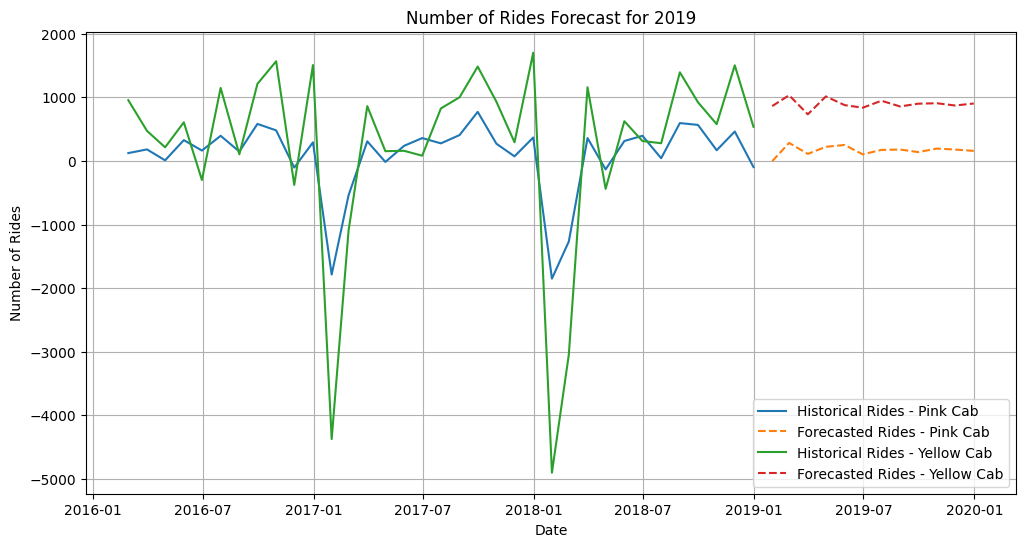

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Step 1: Convert 'Date of Travel' to datetime and extract year
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'])
merged_data['Year'] = merged_data['Date of Travel'].dt.year

# Step 2: Aggregate Monthly Ride Count (2016-2018)
filtered_data = merged_data[merged_data['Year'] < 2019]  # Use only past years
monthly_rides = filtered_data.groupby([pd.Grouper(key='Date of Travel', freq='M'), 'Company'])['Transaction ID'].count().unstack()

# Step 3: Forecast for Each Company
companies = monthly_rides.columns
forecast_steps = 12  # Forecast for 12 months of 2019

plt.figure(figsize=(12, 6))

for company in companies:
    print(f"\nProcessing forecast for {company}...")

    # Step 3.1: Check for stationarity
    result = adfuller(monthly_rides[company].dropna())
    print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

    # If data is non-stationary, apply differencing
    if result[1] > 0.05:
        print(f"Data is non-stationary for {company}, applying differencing...")
        monthly_rides[company] = monthly_rides[company].diff().dropna()

    # Step 3.2: Fit ARIMA Model
    model = ARIMA(monthly_rides[company], order=(5,1,0))  # (p,d,q) values can be tuned
    model_fit = model.fit()

    # Step 3.3: Forecasting 2019
    forecast_index = pd.date_range(start='2019-01-01', periods=forecast_steps, freq='M')
    forecast = model_fit.forecast(steps=forecast_steps)

    # Step 3.4: Plot Results
    plt.plot(monthly_rides.index, monthly_rides[company], label=f"Historical Rides - {company}")
    plt.plot(forecast_index, forecast, linestyle='--', label=f"Forecasted Rides - {company}")

# Step 4: Finalize Plot
plt.title("Number of Rides Forecast for 2019")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.legend()
plt.grid(True)
plt.show()
